# 1. Problem description and Objective


The <b>Iris flower dataset</b> or Fisher's Iris dataset is a <b>multivatiate</b> dataset introduced by the British Statistician and biologist Ronald Fisher in his 1936 paper. The dataset consists of <b>50 samples</b> from each of three species of Iris(<b>Iris setosa</b>, <b>Iris virginica</b> and <b>Iris versicolor</b>). Four features were measured from each sample: the <b>length</b> and <b>width</b> of the <b>sepals</b> and <b>petals</b>, in centimeters.

# 2. Importing Libraries and Collecting Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(color_codes = True)

In [2]:
def suppress_warnings():
    import warnings
    pd.options.mode.chained_assignment = None
    warnings.filterwarnings('ignore', category = DeprecationWarning)
    warnings.filterwarnings('ignore', category = FutureWarning)

suppress_warnings()

In [3]:
dataset = pd.read_csv('./dataset/iris/iris.csv')

# 3. Variable description and Identification

In [4]:
display(dataset.head())
display(type(dataset))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


pandas.core.frame.DataFrame

In [5]:
dataset.shape

(150, 6)

In [6]:
dataset = dataset.drop('Id', axis = 1)

In [7]:
display(dataset.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
dataset.shape

(150, 5)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dataset.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [11]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

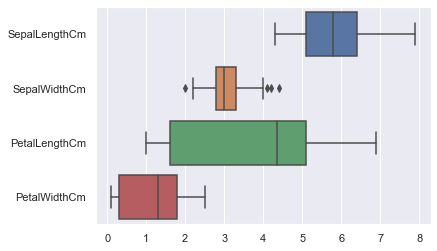

In [13]:
sns.boxplot(data = dataset, orient = 'h')

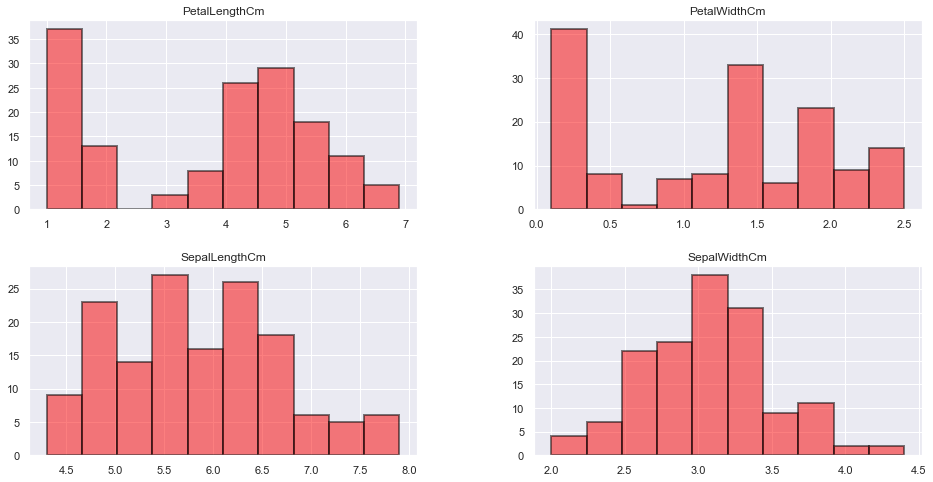

In [14]:
dataset.hist(figsize=(16, 8), color = "#FA0000", alpha=0.5, edgecolor='black', lw=2)
plt.show()

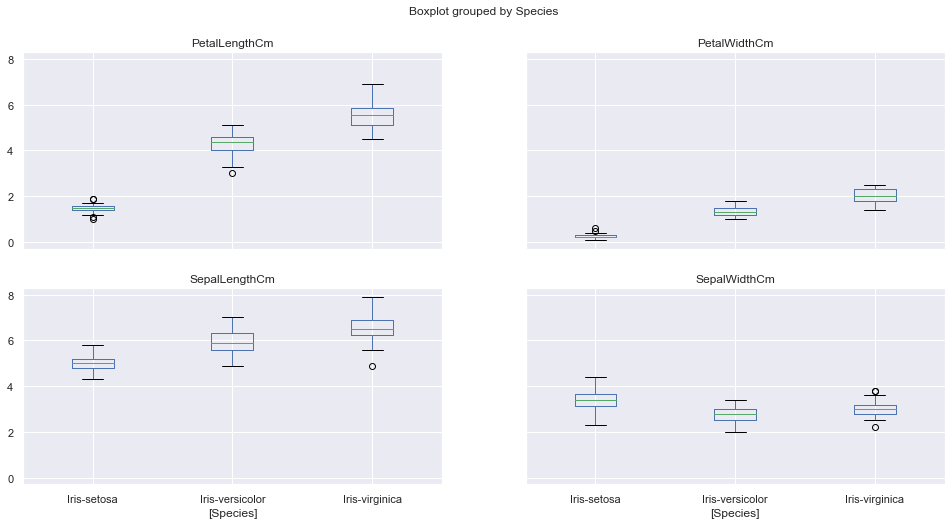

In [15]:
dataset.boxplot(by = 'Species', figsize = (16, 8))
plt.show()

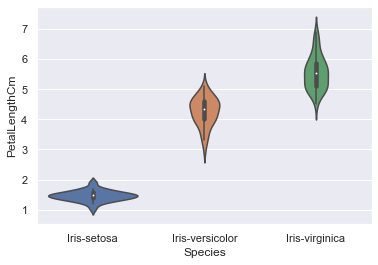

In [16]:
sns.violinplot(data=dataset, x = 'Species', y = 'PetalLengthCm')
plt.show()

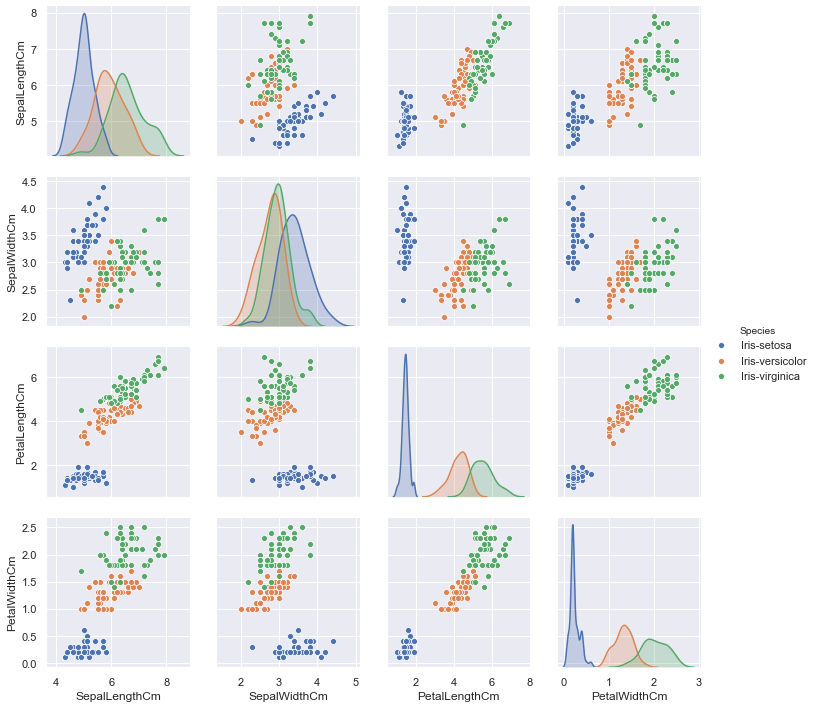

In [17]:
sns.pairplot(dataset, hue="Species", diag_kind='kde')
plt.show()

In [18]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


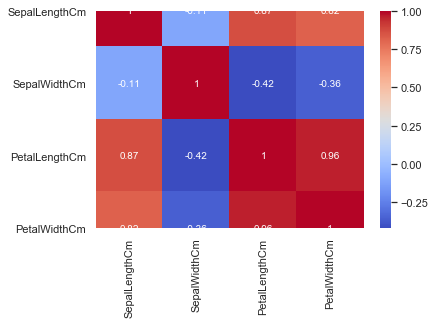

In [19]:
sns.heatmap(dataset.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [20]:
display(dataset.groupby('Species').min(), dataset.groupby('Species').max())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


### Hypothesis Testing
<b>Setting the boundaries of the labels:<br></b>
<li>iris-setosa: 0.0 < PetalLengthCm < 2.5 := 1</li>
<li>iris-versicolot: 2.5 <= PetalLengthCm < 4.9 := 2</li>
<li>iris-virginica: 4.9 <= PetalLengthCm < 8 := 3</li>
<li>others (if data comes out of the ranges) := -1</li>

In [21]:
dataset['Label'] = np.arange(0, 150)
for i in range (0, 150):
    if(dataset['PetalLengthCm'][i] > 0.0 and dataset['PetalLengthCm'][i] < 2.5):
        dataset['Label'][i] = 1
    elif(dataset['PetalLengthCm'][i] >= 2.5 and dataset['PetalLengthCm'][i] < 4.9):
        dataset['Label'][i] = 2
    elif(dataset['PetalLengthCm'][i] >= 4.9 and dataset['PetalLengthCm'][i] < 8):
        dataset['Label'][i] = 3
    else:
        dataset['Label'][i] = -1
        
display(dataset.groupby('Label').size())
display(dataset.groupby('Species').size())

Label
1    50
2    49
3    51
dtype: int64

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [22]:
count = 0
for i in range(0, 150):
    if((dataset['Label'][i] == 1 and dataset['Species'][i] == 'Iris-setosa') or (dataset['Label'][i] == 2 and dataset['Species'][i] == 'Iris-versicolor') or (dataset['Label'][i] == 3 and dataset['Species'][i] == 'Iris-virginica')):
        count = count + 1
print('Correct Prediction: ', count)
print('Wrong Prediction: ', 150 - count)
print('Accuracy: ', count/150 * 100)

Correct Prediction:  143
Wrong Prediction:  7
Accuracy:  95.33333333333334


<p style="color:#006400;"><b>Hypothesis: PASSED</b><br>
Accuracy: 95.33%</p>